#### 1. Import and Install Dependencies

In [3]:
! pip install tensorflow==2.12.0 tensorflow[gpu] opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


#### 2. Keypoints using MP Holistic

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
%pip install tensorflow==2.12.0 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mediapipe as mp

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
! cv2.cvtColor??

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [4]:
def draw_styled_landmarks3(image, results):
    # Draw face connections (Light Gray)
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(192,192,192), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(192,192,192), thickness=1, circle_radius=1)
                             ) 

    # Draw pose connections (keeping original colors)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections (Blue)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections (Red)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
                             ) 

In [5]:
#mp_holistic = mp.solutions.holistic
mp_holistic.POSE_CONNECTIONS


frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [13]:
! mp_drawing.draw_landmarks??


Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [14]:
def main():
    cap = cv2.VideoCapture(0)
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            # Draw landmarks
            draw_styled_landmarks3(image, results)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        # Release the capture and destroy all windows
        cap.release()
        cv2.destroyAllWindows()
if __name__ == "__main__":
    main()

c:\Program Files\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [13]:
#     # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
#     # Draw right hand connections  
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [29]:

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        #draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()

c:\Program Files\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
results.face_landmarks

NameError: name 'results' is not defined

In [31]:
len(results.face_landmarks.landmark)

468

In [32]:
len(results.pose_landmarks.landmark)

33

In [33]:
len(results.left_hand_landmarks.landmark)


21

In [34]:
frame

array([[[144, 128, 142],
        [145, 131, 143],
        [143, 134, 142],
        ...,
        [201, 202, 189],
        [204, 207, 195],
        [195, 199, 190]],

       [[143, 130, 141],
        [146, 134, 143],
        [144, 136, 142],
        ...,
        [202, 202, 189],
        [202, 204, 192],
        [195, 199, 188]],

       [[140, 134, 139],
        [142, 136, 140],
        [142, 138, 139],
        ...,
        [206, 204, 190],
        [203, 203, 190],
        [199, 201, 189]],

       ...,

       [[ 70,  75,  57],
        [ 68,  74,  56],
        [ 65,  73,  55],
        ...,
        [ 43,  64,  38],
        [ 43,  64,  38],
        [ 44,  65,  39]],

       [[ 68,  71,  53],
        [ 66,  70,  52],
        [ 64,  70,  52],
        ...,
        [ 45,  67,  41],
        [ 44,  67,  40],
        [ 42,  65,  37]],

       [[ 65,  67,  48],
        [ 65,  67,  48],
        [ 65,  69,  50],
        ...,
        [ 49,  72,  45],
        [ 47,  71,  43],
        [ 43,  67,  39]]

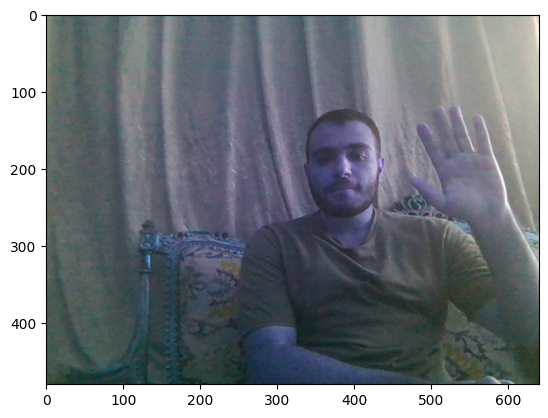

In [35]:

plt.imshow(frame)

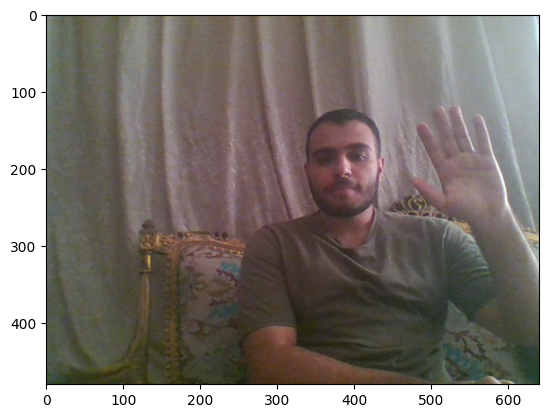

In [36]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [37]:
results

mediapipe.python.solution_base.SolutionOutputs

In [38]:
draw_styled_landmarks3(frame, results)

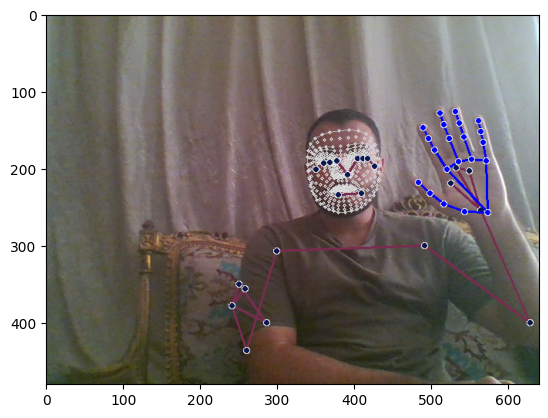

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# import cv2
# import mediapipe as mp

# # Initialize MediaPipe Holistic model
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils

# def mediapipe_detection(image, model):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB
#     results = model.process(image)  # Make detections
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert the image back to BGR
#     return image, results

# cap = cv2.VideoCapture(0)
# # Access MediaPipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         # Read feed
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)

#         # Draw landmarks
#         if results.pose_landmarks:
#             mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#         if results.face_landmarks:
#             mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)
#         if results.left_hand_landmarks:
#             mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
#         if results.right_hand_landmarks:
#             mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

#         # Display the resulting frame
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

#     # Release the capture and destroy all windows
#     cap.release()
#     cv2.destroyAllWindows()

In [26]:
# import cv2
# import mediapipe as mp

# mp_drawing = mp.solutions.drawing_utils
# mp_holistic = mp.solutions.holistic


In [40]:
mp_holistic.POSE_CONNECTIONS


frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [41]:
results.face_landmarks

landmark {
  x: 0.601952493
  y: 0.463288128
  z: -0.0208435226
}
landmark {
  x: 0.599637091
  y: 0.433142632
  z: -0.033735428
}
landmark {
  x: 0.600936472
  y: 0.443584889
  z: -0.0189437661
}
landmark {
  x: 0.593597949
  y: 0.40704602
  z: -0.022934854
}
landmark {
  x: 0.599119067
  y: 0.424238503
  z: -0.0352925844
}
landmark {
  x: 0.598809183
  y: 0.413388878
  z: -0.031995479
}
landmark {
  x: 0.598406732
  y: 0.388573915
  z: -0.0127861407
}
landmark {
  x: 0.555444837
  y: 0.397034496
  z: 0.0148536852
}
landmark {
  x: 0.5976758
  y: 0.369597822
  z: -0.00681768
}
landmark {
  x: 0.597126722
  y: 0.357916296
  z: -0.00698250905
}
landmark {
  x: 0.595074952
  y: 0.315386295
  z: 0.00415073149
}
landmark {
  x: 0.602166414
  y: 0.467387974
  z: -0.0203271098
}
landmark {
  x: 0.602446198
  y: 0.470541388
  z: -0.0183744114
}
landmark {
  x: 0.602724731
  y: 0.47192347
  z: -0.0157167297
}
landmark {
  x: 0.602911353
  y: 0.472756207
  z: -0.0155579336
}
landmark {
  x: 0.6

In [29]:
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print("Failed to grab frame")
#             break

#         image, results = mediapipe_detection(frame, holistic)
                
#         cv2.imshow('OpenCV Feed', frame)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

In [42]:
len(results.face_landmarks.landmark)

468

In [43]:
len(results.pose_landmarks.landmark)

33

In [44]:
if results.left_hand_landmarks:
    print(len(results.left_hand_landmarks.landmark))
else:
    print("No left hand landmarks detected")


21


In [45]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [34]:
# def draw_styled_landmarks2(images, results):
#     # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
#                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                                 )
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     # Draw right hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [27]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [36]:
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print("Failed to grab frame")
#             break

#         image, results = mediapipe_detection(frame, holistic)
        
#         draw_landmarks(image, results)
        
#         cv2.imshow('OpenCV Feed', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

#### 3. Extract Keypoint Values

In [32]:

cap.release()
cv2.destroyAllWindows()

In [46]:
results

mediapipe.python.solution_base.SolutionOutputs

In [47]:
results.pose_landmarks

landmark {
  x: 0.612434089
  y: 0.433889598
  z: -0.364038646
  visibility: 0.999980927
}
landmark {
  x: 0.632214665
  y: 0.391160786
  z: -0.311359525
  visibility: 0.99995786
}
landmark {
  x: 0.643027902
  y: 0.390756607
  z: -0.311207056
  visibility: 0.999967635
}
landmark {
  x: 0.652161539
  y: 0.391151875
  z: -0.311001837
  visibility: 0.999962151
}
landmark {
  x: 0.590544403
  y: 0.396924
  z: -0.322160333
  visibility: 0.999964356
}
landmark {
  x: 0.576515496
  y: 0.400039613
  z: -0.321871
  visibility: 0.999972105
}
landmark {
  x: 0.563347042
  y: 0.402953982
  z: -0.322276473
  visibility: 0.999966
}
landmark {
  x: 0.667024
  y: 0.410646856
  z: -0.0310267564
  visibility: 0.999966204
}
landmark {
  x: 0.547273576
  y: 0.419390976
  z: -0.0727168098
  visibility: 0.999984145
}
landmark {
  x: 0.639952
  y: 0.484723479
  z: -0.261046
  visibility: 0.999967754
}
landmark {
  x: 0.593258
  y: 0.488398939
  z: -0.2748757
  visibility: 0.999978185
}
landmark {
  x: 0.768

In [48]:
results.pose_landmarks.landmark

[x: 0.612434089
y: 0.433889598
z: -0.364038646
visibility: 0.999980927
, x: 0.632214665
y: 0.391160786
z: -0.311359525
visibility: 0.99995786
, x: 0.643027902
y: 0.390756607
z: -0.311207056
visibility: 0.999967635
, x: 0.652161539
y: 0.391151875
z: -0.311001837
visibility: 0.999962151
, x: 0.590544403
y: 0.396924
z: -0.322160333
visibility: 0.999964356
, x: 0.576515496
y: 0.400039613
z: -0.321871
visibility: 0.999972105
, x: 0.563347042
y: 0.402953982
z: -0.322276473
visibility: 0.999966
, x: 0.667024
y: 0.410646856
z: -0.0310267564
visibility: 0.999966204
, x: 0.547273576
y: 0.419390976
z: -0.0727168098
visibility: 0.999984145
, x: 0.639952
y: 0.484723479
z: -0.261046
visibility: 0.999967754
, x: 0.593258
y: 0.488398939
z: -0.2748757
visibility: 0.999978185
, x: 0.768368602
y: 0.625115037
z: 0.130593985
visibility: 0.999907613
, x: 0.467527241
y: 0.64026016
z: 0.012034025
visibility: 0.999738038
, x: 0.981469512
y: 0.833446503
z: -0.197261602
visibility: 0.982539296
, x: 0.407707751
y

In [49]:
len(results.pose_landmarks.landmark)

33

In [50]:
results.left_hand_landmarks

landmark {
  x: 0.896404386
  y: 0.537491083
  z: 2.80987251e-007
}
landmark {
  x: 0.849981904
  y: 0.534181595
  z: -0.0201541688
}
landmark {
  x: 0.807780504
  y: 0.514236391
  z: -0.0306926463
}
landmark {
  x: 0.779514849
  y: 0.484293401
  z: -0.0392152034
}
landmark {
  x: 0.755124331
  y: 0.455173045
  z: -0.0466692559
}
landmark {
  x: 0.813645482
  y: 0.420465678
  z: -0.0142234853
}
landmark {
  x: 0.78848654
  y: 0.368150145
  z: -0.0268320628
}
landmark {
  x: 0.77509439
  y: 0.336447
  z: -0.037938118
}
landmark {
  x: 0.765
  y: 0.307073534
  z: -0.0461750217
}
landmark {
  x: 0.837292194
  y: 0.399642736
  z: -0.0144917415
}
landmark {
  x: 0.817248464
  y: 0.337173581
  z: -0.0239232369
}
landmark {
  x: 0.807117522
  y: 0.299339771
  z: -0.0324684046
}
landmark {
  x: 0.799640477
  y: 0.266943932
  z: -0.0391065478
}
landmark {
  x: 0.863600492
  y: 0.392928511
  z: -0.0179678313
}
landmark {
  x: 0.847618699
  y: 0.331708074
  z: -0.0288380366
}
landmark {
  x: 0.83

In [51]:
if results.left_hand_landmarks:
    print(results.left_hand_landmarks.landmark)
else:
    print("No left hand landmarks detected")


[x: 0.896404386
y: 0.537491083
z: 2.80987251e-007
, x: 0.849981904
y: 0.534181595
z: -0.0201541688
, x: 0.807780504
y: 0.514236391
z: -0.0306926463
, x: 0.779514849
y: 0.484293401
z: -0.0392152034
, x: 0.755124331
y: 0.455173045
z: -0.0466692559
, x: 0.813645482
y: 0.420465678
z: -0.0142234853
, x: 0.78848654
y: 0.368150145
z: -0.0268320628
, x: 0.77509439
y: 0.336447
z: -0.037938118
, x: 0.765
y: 0.307073534
z: -0.0461750217
, x: 0.837292194
y: 0.399642736
z: -0.0144917415
, x: 0.817248464
y: 0.337173581
z: -0.0239232369
, x: 0.807117522
y: 0.299339771
z: -0.0324684046
, x: 0.799640477
y: 0.266943932
z: -0.0391065478
, x: 0.863600492
y: 0.392928511
z: -0.0179678313
, x: 0.847618699
y: 0.331708074
z: -0.0288380366
, x: 0.838656187
y: 0.295287132
z: -0.0353329442
, x: 0.830998
y: 0.263582289
z: -0.040111769
, x: 0.89292872
y: 0.396276504
z: -0.0235194694
, x: 0.887367129
y: 0.347590297
z: -0.033852037
, x: 0.882730126
y: 0.316883385
z: -0.0375402197
, x: 0.878013909
y: 0.288706064
z: -0

In [52]:
if results.left_hand_landmarks:
    num_landmarks = len(results.left_hand_landmarks.landmark)
    print(num_landmarks)
    print(num_landmarks * 3)
else:
    print("No left hand landmarks detected")


21
63


In [53]:
print(f"X landmark: {results.pose_landmarks.landmark[0].x}")
print(f"Y landmark: {results.pose_landmarks.landmark[0].y}")
print(f"Z landmark: {results.pose_landmarks.landmark[0].z}")
print(f"Visibilty landmark: {results.pose_landmarks.landmark[0].visibility}")


X landmark: 0.6124340891838074
Y landmark: 0.43388959765434265
Z landmark: -0.3640386462211609
Visibilty landmark: 0.9999809265136719


In [54]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [55]:
test

array([ 5.86586356e-01,  2.20109677e+00, -4.24681991e-01,  1.30915912e-04])

In [56]:
all_landmarks = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    all_landmarks.append(test)
all_landmarks

[array([ 0.61243409,  0.4338896 , -0.36403865,  0.99998093]),
 array([ 0.63221467,  0.39116079, -0.31135952,  0.99995786]),
 array([ 0.6430279 ,  0.39075661, -0.31120706,  0.99996763]),
 array([ 0.65216154,  0.39115188, -0.31100184,  0.99996215]),
 array([ 0.5905444 ,  0.39692399, -0.32216033,  0.99996436]),
 array([ 0.5765155 ,  0.40003961, -0.32187101,  0.99997211]),
 array([ 0.56334704,  0.40295398, -0.32227647,  0.99996603]),
 array([ 0.66702402,  0.41064686, -0.03102676,  0.9999662 ]),
 array([ 0.54727358,  0.41939098, -0.07271681,  0.99998415]),
 array([ 0.639952  ,  0.48472348, -0.26104599,  0.99996775]),
 array([ 0.59325802,  0.48839894, -0.2748757 ,  0.99997818]),
 array([0.7683686 , 0.62511504, 0.13059399, 0.99990761]),
 array([0.46752724, 0.64026016, 0.01203403, 0.99973804]),
 array([ 0.98146951,  0.8334465 , -0.1972616 ,  0.9825393 ]),
 array([ 0.40770775,  0.91033387, -0.29998261,  0.93823588]),
 array([ 0.88248044,  0.52920038, -0.60908908,  0.97370297]),
 array([ 0.37792

In [57]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose

[array([ 0.61243409,  0.4338896 , -0.36403865,  0.99998093]),
 array([ 0.63221467,  0.39116079, -0.31135952,  0.99995786]),
 array([ 0.6430279 ,  0.39075661, -0.31120706,  0.99996763]),
 array([ 0.65216154,  0.39115188, -0.31100184,  0.99996215]),
 array([ 0.5905444 ,  0.39692399, -0.32216033,  0.99996436]),
 array([ 0.5765155 ,  0.40003961, -0.32187101,  0.99997211]),
 array([ 0.56334704,  0.40295398, -0.32227647,  0.99996603]),
 array([ 0.66702402,  0.41064686, -0.03102676,  0.9999662 ]),
 array([ 0.54727358,  0.41939098, -0.07271681,  0.99998415]),
 array([ 0.639952  ,  0.48472348, -0.26104599,  0.99996775]),
 array([ 0.59325802,  0.48839894, -0.2748757 ,  0.99997818]),
 array([0.7683686 , 0.62511504, 0.13059399, 0.99990761]),
 array([0.46752724, 0.64026016, 0.01203403, 0.99973804]),
 array([ 0.98146951,  0.8334465 , -0.1972616 ,  0.9825393 ]),
 array([ 0.40770775,  0.91033387, -0.29998261,  0.93823588]),
 array([ 0.88248044,  0.52920038, -0.60908908,  0.97370297]),
 array([ 0.37792

In [58]:
len(pose)

33

In [59]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros(132)

In [60]:
pose.shape

(33, 4)

In [61]:
pose

array([[ 6.12434089e-01,  4.33889598e-01, -3.64038646e-01,
         9.99980927e-01],
       [ 6.32214665e-01,  3.91160786e-01, -3.11359525e-01,
         9.99957860e-01],
       [ 6.43027902e-01,  3.90756607e-01, -3.11207056e-01,
         9.99967635e-01],
       [ 6.52161539e-01,  3.91151875e-01, -3.11001837e-01,
         9.99962151e-01],
       [ 5.90544403e-01,  3.96923989e-01, -3.22160333e-01,
         9.99964356e-01],
       [ 5.76515496e-01,  4.00039613e-01, -3.21871012e-01,
         9.99972105e-01],
       [ 5.63347042e-01,  4.02953982e-01, -3.22276473e-01,
         9.99966025e-01],
       [ 6.67024016e-01,  4.10646856e-01, -3.10267564e-02,
         9.99966204e-01],
       [ 5.47273576e-01,  4.19390976e-01, -7.27168098e-02,
         9.99984145e-01],
       [ 6.39952004e-01,  4.84723479e-01, -2.61045992e-01,
         9.99967754e-01],
       [ 5.93258023e-01,  4.88398939e-01, -2.74875700e-01,
         9.99978185e-01],
       [ 7.68368602e-01,  6.25115037e-01,  1.30593985e-01,
      

In [62]:
len(pose)

33

In [63]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [64]:
pose

array([ 6.12434089e-01,  4.33889598e-01, -3.64038646e-01,  9.99980927e-01,
        6.32214665e-01,  3.91160786e-01, -3.11359525e-01,  9.99957860e-01,
        6.43027902e-01,  3.90756607e-01, -3.11207056e-01,  9.99967635e-01,
        6.52161539e-01,  3.91151875e-01, -3.11001837e-01,  9.99962151e-01,
        5.90544403e-01,  3.96923989e-01, -3.22160333e-01,  9.99964356e-01,
        5.76515496e-01,  4.00039613e-01, -3.21871012e-01,  9.99972105e-01,
        5.63347042e-01,  4.02953982e-01, -3.22276473e-01,  9.99966025e-01,
        6.67024016e-01,  4.10646856e-01, -3.10267564e-02,  9.99966204e-01,
        5.47273576e-01,  4.19390976e-01, -7.27168098e-02,  9.99984145e-01,
        6.39952004e-01,  4.84723479e-01, -2.61045992e-01,  9.99967754e-01,
        5.93258023e-01,  4.88398939e-01, -2.74875700e-01,  9.99978185e-01,
        7.68368602e-01,  6.25115037e-01,  1.30593985e-01,  9.99907613e-01,
        4.67527241e-01,  6.40260160e-01,  1.20340250e-02,  9.99738038e-01,
        9.81469512e-01,  

In [65]:
face

array([ 0.60195249,  0.46328813, -0.02084352, ...,  0.37950957,
        0.00998408,  0.        ])

In [66]:
lh

array([ 8.96404386e-01,  5.37491083e-01,  2.80987251e-07,  0.00000000e+00,
        8.49981904e-01,  5.34181595e-01, -2.01541688e-02,  0.00000000e+00,
        8.07780504e-01,  5.14236391e-01, -3.06926463e-02,  0.00000000e+00,
        7.79514849e-01,  4.84293401e-01, -3.92152034e-02,  0.00000000e+00,
        7.55124331e-01,  4.55173045e-01, -4.66692559e-02,  0.00000000e+00,
        8.13645482e-01,  4.20465678e-01, -1.42234853e-02,  0.00000000e+00,
        7.88486540e-01,  3.68150145e-01, -2.68320628e-02,  0.00000000e+00,
        7.75094390e-01,  3.36447001e-01, -3.79381180e-02,  0.00000000e+00,
        7.64999986e-01,  3.07073534e-01, -4.61750217e-02,  0.00000000e+00,
        8.37292194e-01,  3.99642736e-01, -1.44917415e-02,  0.00000000e+00,
        8.17248464e-01,  3.37173581e-01, -2.39232369e-02,  0.00000000e+00,
        8.07117522e-01,  2.99339771e-01, -3.24684046e-02,  0.00000000e+00,
        7.99640477e-01,  2.66943932e-01, -3.91065478e-02,  0.00000000e+00,
        8.63600492e-01,  

In [67]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
len(rh)

63

In [69]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
lh

array([ 8.96404386e-01,  5.37491083e-01,  2.80987251e-07,  0.00000000e+00,
        8.49981904e-01,  5.34181595e-01, -2.01541688e-02,  0.00000000e+00,
        8.07780504e-01,  5.14236391e-01, -3.06926463e-02,  0.00000000e+00,
        7.79514849e-01,  4.84293401e-01, -3.92152034e-02,  0.00000000e+00,
        7.55124331e-01,  4.55173045e-01, -4.66692559e-02,  0.00000000e+00,
        8.13645482e-01,  4.20465678e-01, -1.42234853e-02,  0.00000000e+00,
        7.88486540e-01,  3.68150145e-01, -2.68320628e-02,  0.00000000e+00,
        7.75094390e-01,  3.36447001e-01, -3.79381180e-02,  0.00000000e+00,
        7.64999986e-01,  3.07073534e-01, -4.61750217e-02,  0.00000000e+00,
        8.37292194e-01,  3.99642736e-01, -1.44917415e-02,  0.00000000e+00,
        8.17248464e-01,  3.37173581e-01, -2.39232369e-02,  0.00000000e+00,
        8.07117522e-01,  2.99339771e-01, -3.24684046e-02,  0.00000000e+00,
        7.99640477e-01,  2.66943932e-01, -3.91065478e-02,  0.00000000e+00,
        8.63600492e-01,  

In [71]:
lh.shape

(84,)

In [72]:
pose

array([ 6.12434089e-01,  4.33889598e-01, -3.64038646e-01,  9.99980927e-01,
        6.32214665e-01,  3.91160786e-01, -3.11359525e-01,  9.99957860e-01,
        6.43027902e-01,  3.90756607e-01, -3.11207056e-01,  9.99967635e-01,
        6.52161539e-01,  3.91151875e-01, -3.11001837e-01,  9.99962151e-01,
        5.90544403e-01,  3.96923989e-01, -3.22160333e-01,  9.99964356e-01,
        5.76515496e-01,  4.00039613e-01, -3.21871012e-01,  9.99972105e-01,
        5.63347042e-01,  4.02953982e-01, -3.22276473e-01,  9.99966025e-01,
        6.67024016e-01,  4.10646856e-01, -3.10267564e-02,  9.99966204e-01,
        5.47273576e-01,  4.19390976e-01, -7.27168098e-02,  9.99984145e-01,
        6.39952004e-01,  4.84723479e-01, -2.61045992e-01,  9.99967754e-01,
        5.93258023e-01,  4.88398939e-01, -2.74875700e-01,  9.99978185e-01,
        7.68368602e-01,  6.25115037e-01,  1.30593985e-01,  9.99907613e-01,
        4.67527241e-01,  6.40260160e-01,  1.20340250e-02,  9.99738038e-01,
        9.81469512e-01,  

In [73]:
len(pose)

132

In [74]:
pose.shape

(132,)

In [75]:
results.face_landmarks

landmark {
  x: 0.601952493
  y: 0.463288128
  z: -0.0208435226
}
landmark {
  x: 0.599637091
  y: 0.433142632
  z: -0.033735428
}
landmark {
  x: 0.600936472
  y: 0.443584889
  z: -0.0189437661
}
landmark {
  x: 0.593597949
  y: 0.40704602
  z: -0.022934854
}
landmark {
  x: 0.599119067
  y: 0.424238503
  z: -0.0352925844
}
landmark {
  x: 0.598809183
  y: 0.413388878
  z: -0.031995479
}
landmark {
  x: 0.598406732
  y: 0.388573915
  z: -0.0127861407
}
landmark {
  x: 0.555444837
  y: 0.397034496
  z: 0.0148536852
}
landmark {
  x: 0.5976758
  y: 0.369597822
  z: -0.00681768
}
landmark {
  x: 0.597126722
  y: 0.357916296
  z: -0.00698250905
}
landmark {
  x: 0.595074952
  y: 0.315386295
  z: 0.00415073149
}
landmark {
  x: 0.602166414
  y: 0.467387974
  z: -0.0203271098
}
landmark {
  x: 0.602446198
  y: 0.470541388
  z: -0.0183744114
}
landmark {
  x: 0.602724731
  y: 0.47192347
  z: -0.0157167297
}
landmark {
  x: 0.602911353
  y: 0.472756207
  z: -0.0155579336
}
landmark {
  x: 0.6

In [76]:
results.face_landmarks.landmark

[x: 0.601952493
y: 0.463288128
z: -0.0208435226
, x: 0.599637091
y: 0.433142632
z: -0.033735428
, x: 0.600936472
y: 0.443584889
z: -0.0189437661
, x: 0.593597949
y: 0.40704602
z: -0.022934854
, x: 0.599119067
y: 0.424238503
z: -0.0352925844
, x: 0.598809183
y: 0.413388878
z: -0.031995479
, x: 0.598406732
y: 0.388573915
z: -0.0127861407
, x: 0.555444837
y: 0.397034496
z: 0.0148536852
, x: 0.5976758
y: 0.369597822
z: -0.00681768
, x: 0.597126722
y: 0.357916296
z: -0.00698250905
, x: 0.595074952
y: 0.315386295
z: 0.00415073149
, x: 0.602166414
y: 0.467387974
z: -0.0203271098
, x: 0.602446198
y: 0.470541388
z: -0.0183744114
, x: 0.602724731
y: 0.47192347
z: -0.0157167297
, x: 0.602911353
y: 0.472756207
z: -0.0155579336
, x: 0.603025
y: 0.475491494
z: -0.0168647729
, x: 0.603173852
y: 0.479383618
z: -0.018652698
, x: 0.603450119
y: 0.484101892
z: -0.0184497349
, x: 0.604137182
y: 0.494578958
z: -0.0134424018
, x: 0.600112915
y: 0.438076973
z: -0.0308338068
, x: 0.595173836
y: 0.438906074
z:

In [77]:
len(results.face_landmarks.landmark)*3

1404

In [ ]:
'''
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*4)
    lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
'''

In [71]:
#extract_keypoints(results).shape

In [79]:
import numpy as np

def extract_keypoints(results):
    # Extract pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Extract face landmarks
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*4)
    
    # Extract left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Extract right hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatenate all landmarks
    return np.concatenate([pose, face, lh, rh])

# Example usage
# Assuming `results` is the output from the MediaPipe model
keypoints = extract_keypoints(results)
print(keypoints.shape)  # Should print (1662,)

(1662,)


In [80]:
result_test = extract_keypoints(results)

In [81]:
result_test

array([ 0.61243409,  0.4338896 , -0.36403865, ...,  0.        ,
        0.        ,  0.        ])

In [82]:
468*3+33*4+21*3+21*3

1662

In [83]:
np.save('0', result_test)

In [84]:
np.load('0.npy')

array([ 0.61243409,  0.4338896 , -0.36403865, ...,  0.        ,
        0.        ,  0.        ])

stopped at 47:24 / 2:27:12

#### 4. Setup Folder for Collection

In [9]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'ilove you'])

# 30 videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [79]:
# hello
## 0
## 1
## 2
## ..
## 29
# thanks

# I love you

In [74]:
for actions in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, actions, str(sequence)))
        except:
            pass

#### 5. Collect Keypoint Values for Training and Testing

In [76]:
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # loop through actions:
    for action in actions:
        # loop through sequences aka videos:
        for sequence in range(no_sequences):
            # loop through video length aka sequence length:
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks3(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)


                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\i\\0\\0.npy'

In [77]:
cap.release()
cv2.destroyAllWindows()


In [82]:
import cv2
import numpy as np
import os
import mediapipe as mp

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Create folders for data collection
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except FileExistsError:
            pass

# Data collection
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

c:\Program Files\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [80]:
# Data collection
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

AttributeError: module 'mediapipe.python.solutions.holistic' has no attribute 'FACE_CONNECTIONS'

In [81]:
cap.release()
cv2.destroyAllWindows()

#### 6. Preprocess Data and Create Labels and Features

In [ ]:
%pip install tensorflow==2.12.0

In [86]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # type: ignore

In [87]:
label_map = ({label:num for num, label in enumerate(actions)})

In [88]:
label_map

{'hello': 0, 'thanks': 1, 'ilove you': 2}

In [89]:
sequences, labels = [], []
for action in actions:
    for seq in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(seq), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\ilove you\\0\\0.npy'

In [91]:
sequences

[[array([ 0.64305252,  0.42725515, -1.20781493, ...,  0.03872186,
          0.95036477, -0.01685937]),
  array([ 0.64313602,  0.42746341, -0.87605906, ...,  0.04343463,
          0.94675231, -0.0134441 ]),
  array([ 0.6431343 ,  0.42763793, -0.96325427, ...,  0.0423835 ,
          0.93867433, -0.00782324]),
  array([ 0.64331996,  0.42761824, -1.01805031, ...,  0.04604537,
          0.93796277, -0.00603325]),
  array([ 0.64337379,  0.42759702, -1.05143189, ...,  0.04734839,
          0.92974818, -0.00505721]),
  array([ 0.64338678,  0.42756888, -0.98502368, ...,  0.05128258,
          0.93634629, -0.00448461]),
  array([ 0.6434859 ,  0.42757109, -1.01019979, ...,  0.04729234,
          0.93703455, -0.0099251 ]),
  array([ 6.44319832e-01,  4.27613527e-01, -1.02968144e+00, ...,
          4.44063321e-02,  9.27201450e-01, -9.48817527e-04]),
  array([ 0.64525205,  0.42830908, -1.04276609, ...,  0.04878107,
          0.94079918, -0.00535659]),
  array([ 0.64529759,  0.42860386, -1.01084268, .

In [92]:
np.array(sequences).shape

(60, 30, 1662)

In [93]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [94]:
np.array(labels).shape

(60,)

In [95]:
X = np.array(sequences)
X

array([[[ 0.64305252,  0.42725515, -1.20781493, ...,  0.03872186,
          0.95036477, -0.01685937],
        [ 0.64313602,  0.42746341, -0.87605906, ...,  0.04343463,
          0.94675231, -0.0134441 ],
        [ 0.6431343 ,  0.42763793, -0.96325427, ...,  0.0423835 ,
          0.93867433, -0.00782324],
        ...,
        [ 0.64138329,  0.43521595, -0.42812151, ...,  0.22862677,
          0.77336442, -0.06606016],
        [ 0.63702393,  0.43169165, -0.40493956, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.63483953,  0.42399064, -0.41458535, ...,  0.28426763,
          0.98118323, -0.04544008]],

       [[ 0.63483775,  0.4176935 , -0.4770239 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.63597924,  0.39677837, -0.914213  , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.63680601,  0.3909367 , -0.83196461, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.6451484 ,  0.41483563, -0.93241042, ...,  

In [96]:
X.shape

(60, 30, 1662)

In [97]:
y = to_categorical(labels).astype(int)
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [98]:
y.shape

(60, 2)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [100]:
X_train.shape

(57, 30, 1662)

In [101]:
X_test.shape

(3, 30, 1662)

In [102]:
y_train.shape

(57, 2)

In [103]:
y_test.shape

(3, 2)

#### 7. Build and Train LSTM Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [103]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [128]:
X.shape

(90, 30, 1662)

In [129]:
actions.shape[0]

3

In [130]:
res = [.7, 0.2, 0.1]

In [108]:
actions[np.argmax(res)]

'hello'

In [33]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [224]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [139]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])


Epoch 1/500
3/3 [==============================] - 5s 105ms/step - loss: 1.6969 - categorical_accuracy: 0.3294
Epoch 2/500
3/3 [==============================] - 0s 100ms/step - loss: 1.4027 - categorical_accuracy: 0.2471
Epoch 3/500
3/3 [==============================] - 0s 106ms/step - loss: 1.9421 - categorical_accuracy: 0.3882
Epoch 4/500
3/3 [==============================] - 0s 108ms/step - loss: 1.1290 - categorical_accuracy: 0.3647
Epoch 5/500
3/3 [==============================] - 0s 99ms/step - loss: 1.0969 - categorical_accuracy: 0.4118
Epoch 6/500
3/3 [==============================] - 0s 109ms/step - loss: 1.0571 - categorical_accuracy: 0.5176
Epoch 7/500
3/3 [==============================] - 0s 110ms/step - loss: 1.1126 - categorical_accuracy: 0.4471
Epoch 8/500
3/3 [==============================] - 0s 96ms/step - loss: 1.1446 - categorical_accuracy: 0.4588
Epoch 9/500
3/3 [==============================] - 0s 103ms/step - loss: 1.0556 - categorical_accuracy: 0.4471
Epo

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

#### 8. Make Predictions

In [144]:
res = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [145]:
np.sum(res[0])

1.0

In [146]:
np.argmax(res[0])

2

In [153]:
actions[np.argmax(res[2])]

'thanks'

In [154]:
actions[np.argmax(y_test[2])]


'thanks'

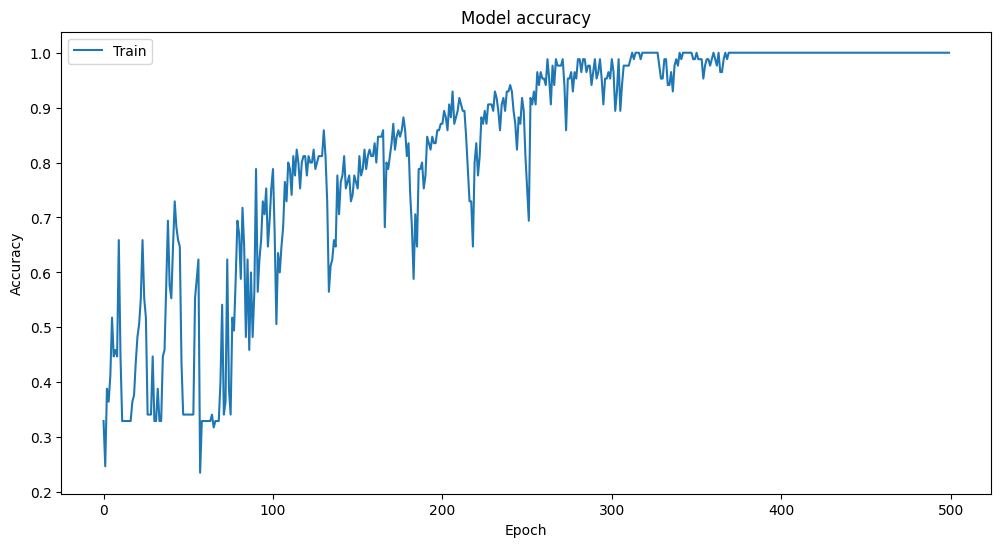

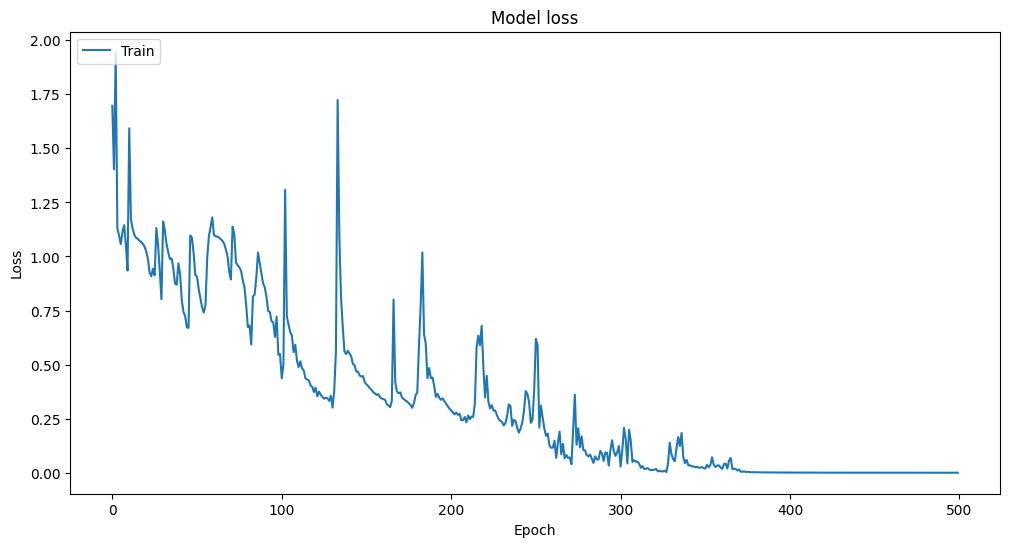

1/1 [==============================] - 1s 598ms/step


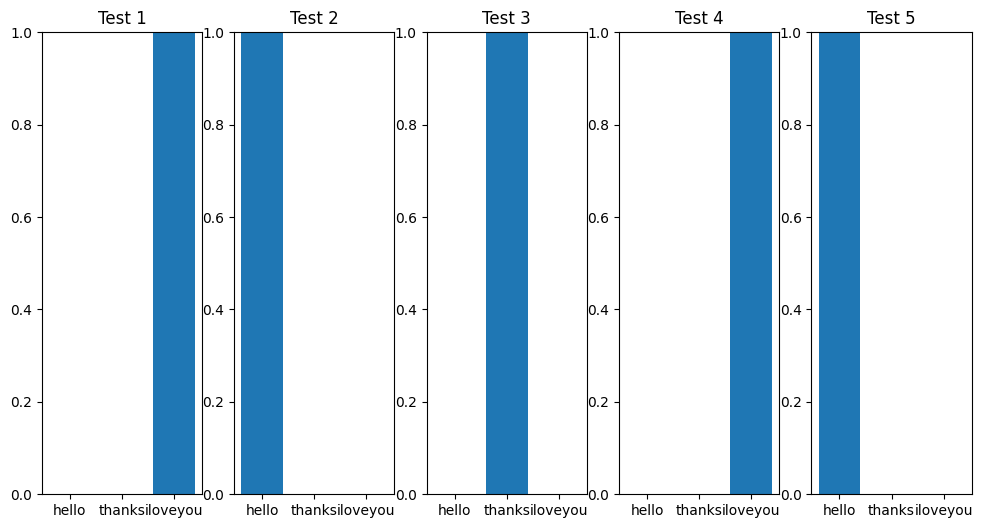

In [141]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot predictions
predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i+1)
    plt.bar(actions, predictions[i])
    plt.title(f'Test {i+1}')
    plt.ylim(0, 1)
plt.show()

In [155]:
model.save('action.h5')

In [30]:
del model

#### 9. Save Weights

In [34]:
model.load_weights('action.h5')

#### 10. Evaluate using Confusion Matrix and Accuracy

In [109]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [74]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [162]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [163]:
ytrue

[2, 0, 1, 2, 0]

In [164]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [165]:
accuracy_score(ytrue, yhat)

1.0

In [166]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 25ms/step


In [167]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [168]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[57,  0],
        [ 0, 28]],

       [[56,  0],
        [ 0, 29]],

       [[57,  0],
        [ 0, 28]]], dtype=int64)

In [169]:
accuracy_score(ytrue, yhat)

1.0

#### 11. Test in Real Time

In [25]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4


cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks3(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            sentence.append(actions[np.argmax(res)])

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            # 3. Posture change detection
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            print(actions[np.argmax(res)])  # Print the detected action
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(actions[np.argmax(res)])  # Print the detected action

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # Viz probabilities
        image = cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 29ms/step
I love you
1/1 [==============================] - 0s 30ms/step
hello
1/1 [==============================] - 0s 28ms/step
I love you
1/1 [==============================] - 0s 34ms/step
thank you
1/1 [==============================] - 0s 29ms/step
hello
1/1 [==============================] - 0s 31ms/step


In [173]:
X_test[0].shape

(30, 1662)

In [174]:
np.expand_dims(X_test[0], axis=0).shape

TypeError: _expand_dims_dispatcher() missing 1 required positional argument: 'axis'

In [175]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 34ms/step


array([[0., 0., 1.]], dtype=float32)

In [186]:
from scipy import stats


In [17]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

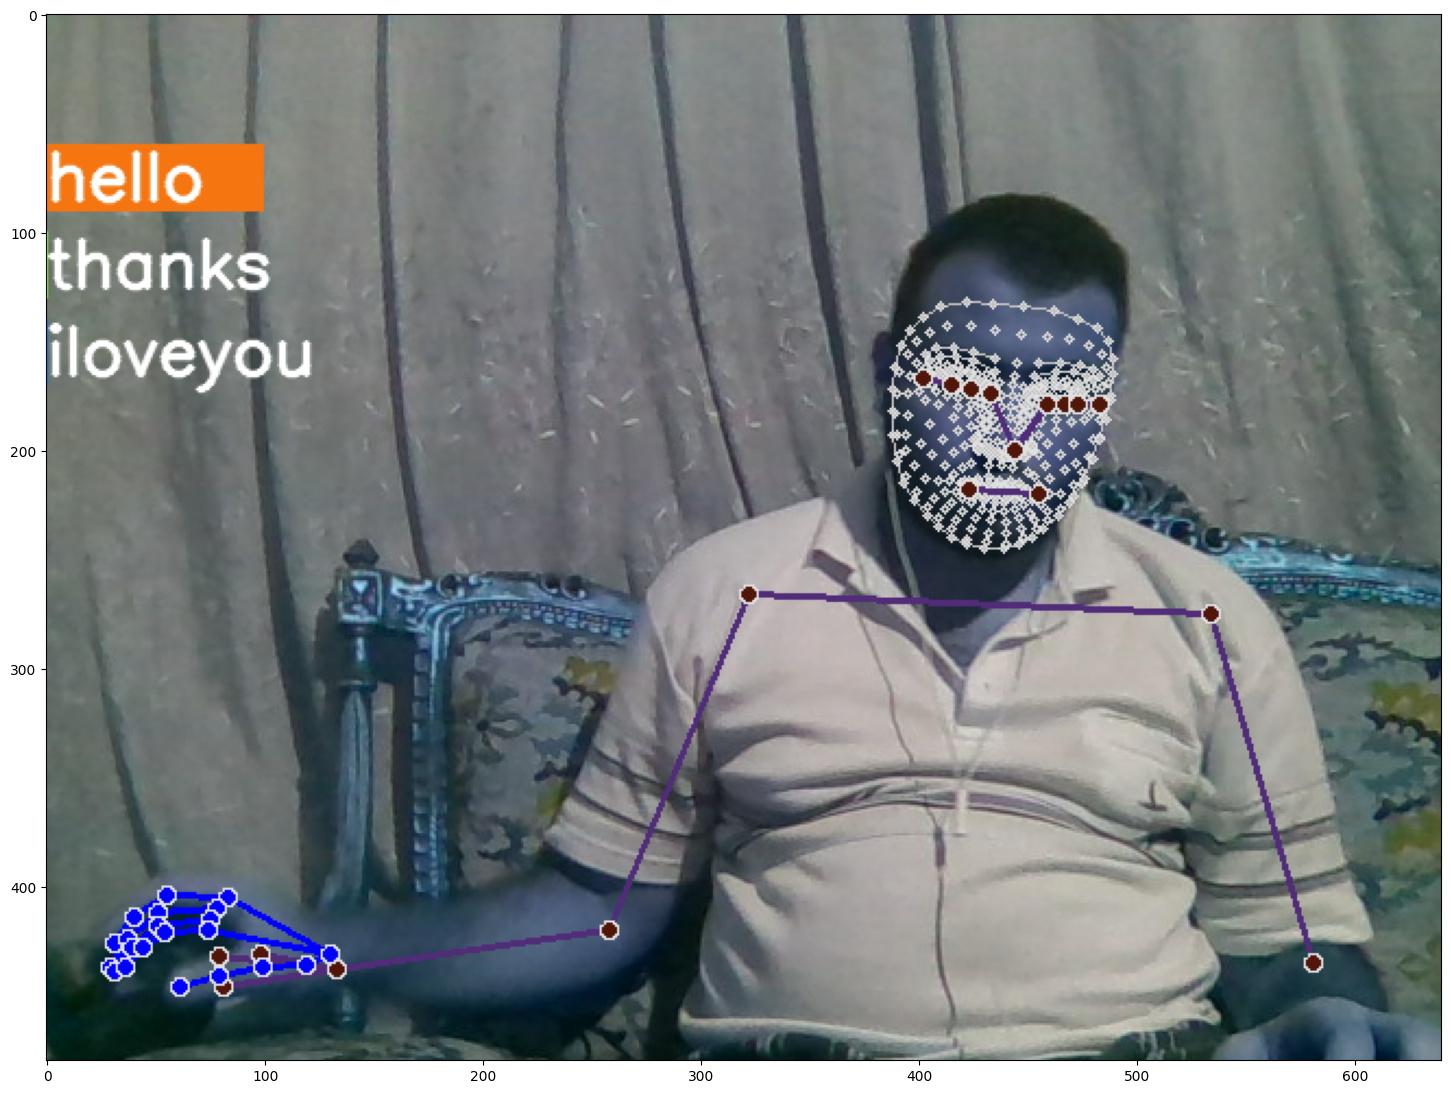

In [191]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))


In [23]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks3(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [199]:
%pip install tensorflow==2.12.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks3(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
model.load_weights('action.h5')

In [35]:
import os
import cv2
import numpy as np
import mediapipe as mp
import pyttsx3

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thank you', 'I love you'])

# 30 videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Initialize TTS engine
engine = pyttsx3.init()

def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB
    results = model.process(image_rgb)  # Make detections
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert the image back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp.solutions.face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    # Extract pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    
    # Extract face landmarks
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    # Extract left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    
    # Extract right hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    
    # Concatenate all landmarks
    return np.concatenate([pose, face, lh, rh])

def np_save(path, array):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(path), exist_ok=True)
    # Save the array to a .npy file
    np.save(path, array)

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks3(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            engine.say(actions[np.argmax(res)])
                            engine.runAndWait()
                    else:
                        sentence.append(actions[np.argmax(res)])
                        engine.say(actions[np.argmax(res)])
                        engine.runAndWait()

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
cap.release()
cv2.destroyAllWindows()

In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
import pyttsx3

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'i love you'])

# 30 videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Initialize TTS engine
engine = pyttsx3.init()

# Define responses for each action
responses = {
    'hello': 'Hi user',
    'thanks': 'You are welcome',
    'i love you': 'I love you too dear'
}

def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB
    results = model.process(image_rgb)  # Make detections
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert the image back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp.solutions.face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    # Extract pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    
    # Extract face landmarks
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    # Extract left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    
    # Extract right hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    
    # Concatenate all landmarks
    return np.concatenate([pose, face, lh, rh])

def np_save(path, array):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(path), exist_ok=True)
    # Save the array to a .npy file
    np.save(path, array)

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks3(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            response = responses[actions[np.argmax(res)]]
                            engine.say(response)
                            engine.runAndWait()
                    else:
                        sentence.append(actions[np.argmax(res)])
                        response = responses[actions[np.argmax(res)]]
                        engine.say(response)
                        engine.runAndWait()

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Program Files\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>


NameError: name 'draw_styled_landmarks3' is not defined

In [2]:
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti


    Error 263 for command:
        open temp.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close temp.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: temp.mp3


PlaysoundException: 
    Error 263 for command:
        open temp.mp3
    The specified device is not open or is not recognized by MCI.

: 